# Support Vector Machines (SVM)
Support Vector Machines (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges and also for outliers detection.

However, it is mostly used in classification problems.

In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well (look at the below snapshot).

Types of SVM kernels:

1. Linear Kernel
2. Polynomial Kernel
3. Radial Basis Function Kernel (RBF)

In [48]:
# import the liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import ML liberaries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR # for regression problems
from sklearn.svm import SVC # for classification problems
from sklearn.svm import OneClassSVM # for outliers detection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score # for evaluation of regression model
from sklearn.metrics import classification_report, confusion_matrix # for evaluation of classification model

## 1. Supprt Vector Regression (SVR)

In [4]:
# load the data set
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [18]:
# data pre-processing (encoding the columns)
for col in df.columns:
    if df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])


In [19]:
# Split the data into Features (X) and Labels (y)
X = df.drop('tip', axis = 1)
y = df['tip']

In [20]:
# Split the data into train, test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [21]:
# call the model
model = SVR()

In [23]:
# train the model
model.fit(X_train, y_train)

SVR()

In [26]:
# prediction
y_pred = model.predict(X_test)
y_pred

array([3.05901341, 1.64841349, 3.77180051, 3.876427  , 2.10531151,
       2.78128898, 3.97793596, 2.02520259, 2.33878575, 2.49986404,
       2.8364076 , 1.8691523 , 1.81244753, 2.30836867, 1.7262316 ,
       2.94473345, 2.93364256, 3.28484987, 2.61361978, 4.81940388,
       3.31559272, 3.22891085, 2.33077211, 1.74873446, 3.26918332,
       1.90914808, 1.78630598, 3.70043052, 2.68521576, 4.9446719 ,
       4.58836455, 1.62435206, 2.89302453, 3.11558293, 2.72104874,
       3.73755934, 2.06137294, 4.77527174, 2.11213028, 3.4064849 ,
       1.84206373, 2.29569337, 3.5708956 , 1.84794488, 1.77830413,
       1.47559628, 1.88774657, 2.96068838, 1.52617878])

In [25]:
# evaluate the model
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 = ', r2_score(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE =  0.538321847289585
R2 =  0.5693326496439823
RMSE =  0.7337041960419641


## 2. Support Vector Regression (SVR)

In [28]:
# load the dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [30]:
# Choose Features (X) and Labels (y)
X = df.drop('species', axis = 1)
y = df['species']

In [31]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
# call the model
model = SVC()

In [37]:
# train the model
model.fit(X_train, y_train)

SVC()

In [38]:
# preddiction
y_pred = model.predict(X_test)

In [39]:
# evaluate the model
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



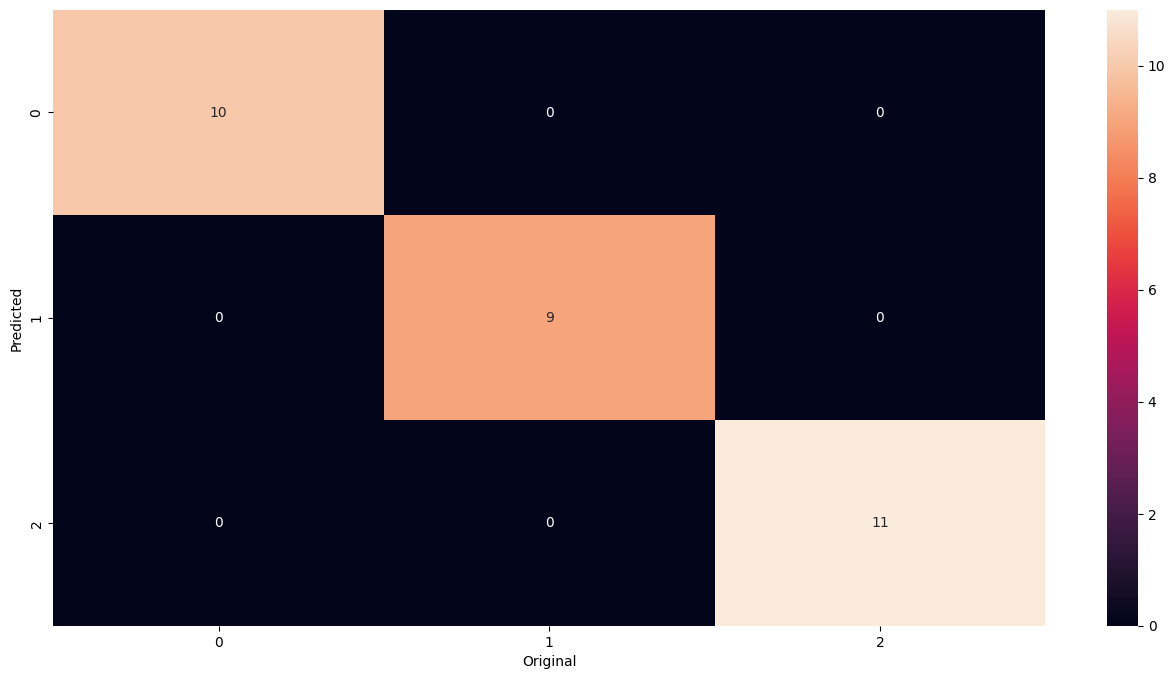

In [42]:
# plot the confussion matrix
plt.figure(figsize = (16, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.show()

## 3. Outliers Detection

In [44]:
# load the dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


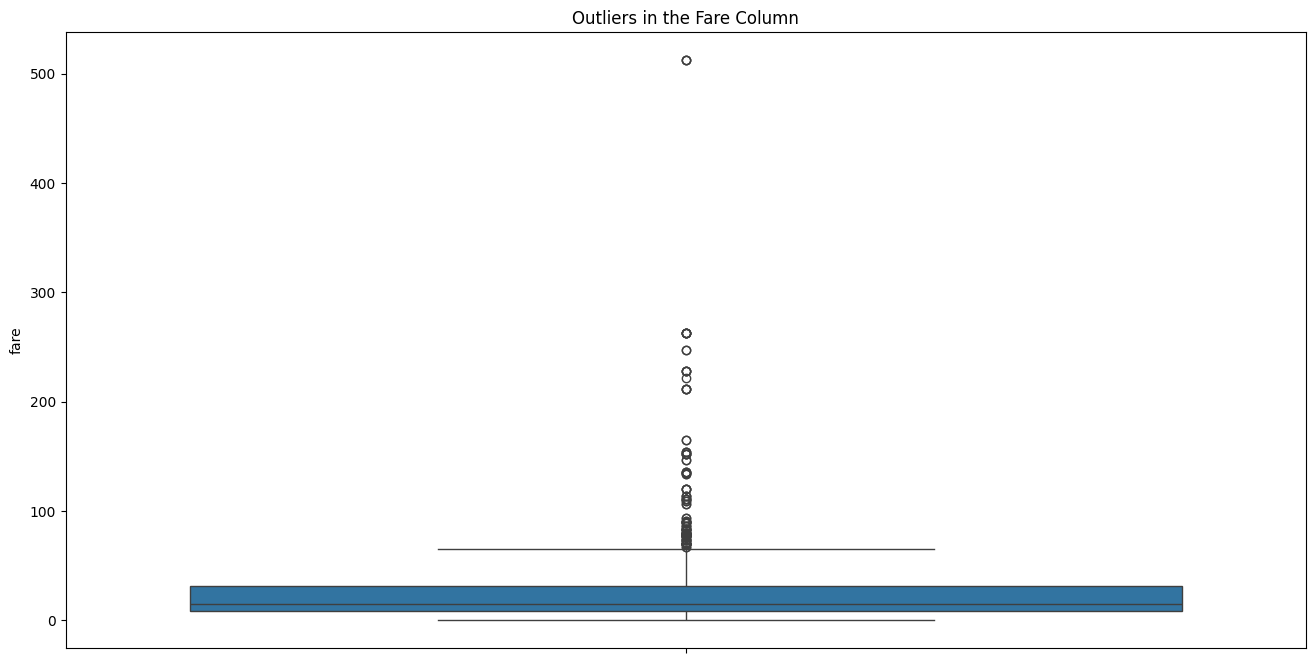

In [85]:
# check for outliers in fare column
plt.figure(figsize = (16, 8))
sns.boxplot(data = df['fare'])
plt.title('Outliers in the Fare Column')
plt.show()

In [54]:
# select the fare column and convert it into pandas DataFrame
data = pd.DataFrame(df['fare'])

In [78]:
# call the model
model = OneClassSVM(nu = 0.05)

In [79]:
# fit the data
model.fit(data)

OneClassSVM(nu=0.05)

In [80]:
# prediction
outlier_predictions = model.predict(data)
outlier_predictions

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [86]:
# Identify the indices of outlier points (where predictions are -1)
outlier_indices = np.where(outlier_predictions == -1)[0]

In [87]:
# Print the indices of the outlier points
print("Indices of outlier points:")
print(outlier_indices)

Indices of outlier points:
[ 27  54  88  92  97 118 155 179 258 263 268 271 277 299 302 306 307 311
 318 332 341 377 380 413 438 466 481 505 513 527 537 544 550 557 581 597
 609 615 633 674 679 689 698 700 716 730 732 737 742 754 779 806 815 822
 856]
